In [23]:
import librosa
import soundfile as sf
import torchaudio
import torch
import matplotlib.pyplot as plt
import numpy as np

In [73]:
def spectrogram(waveform, sr, chunk_size_s=None, overlap=0, *, n_mels=80, n_fft=256):
    if chunk_size_s == None:
        return torchaudio.transforms.MelSpectrogram(n_mels=n_mels, n_fft=n_fft)(torch.Tensor(waveform).reshape(1,-1))

    chunk_size = int(chunk_size_s * sr)
    chunks = torch.FloatTensor(list(chunk_waveform(waveform, chunk_size, overlap)))
    specgram = torchaudio.transforms.MelSpectrogram(n_mels=n_mels, n_fft=n_fft)(chunks)
    return specgram

def chunk_waveform(waveform, chunk_size, overlap):
    idx = 0
    # overlap_chunk = 0
    overlap_chunk = int(overlap * chunk_size)
    while idx + chunk_size - overlap_chunk <= len(waveform):
        yield waveform[idx:idx + chunk_size - overlap_chunk]
        idx += chunk_size - overlap_chunk

In [74]:
filepath = r"C:\Users\jiyun\Desktop\Jiyu\2020-2021\ESC499 - Thesis\WaveNet\magnatagatune\data\simple\macdonald-piano.mp3"
chunk_size_s = None
overlap = 0

waveform, sr = librosa.load(filepath)
waveform = waveform[:int(sr*5)] # first 5 sec
specgram = spectrogram(waveform, sr, chunk_size_s=chunk_size_s, overlap=overlap)

C:\Users\jiyun\anaconda3\lib\site-packages\torchaudio\functional.py:317: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (80) may be set too high. Or, the value for `n_freqs` (129) may be set too low.
  warnings.warn(


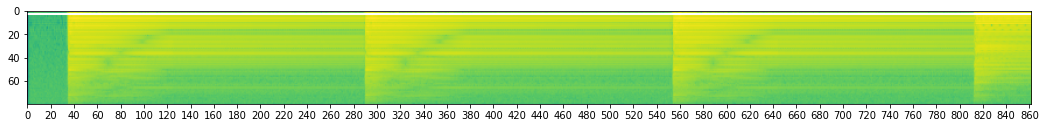

In [81]:
fig = plt.figure(figsize=(18,2))
plt.xticks(np.arange(0, specgram.shape[-1], 20))
plt.imshow(specgram.log2()[0,:,:].detach().numpy())

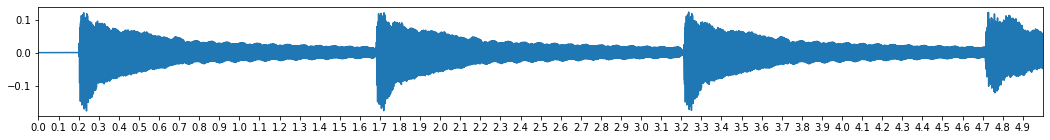

In [43]:
fig = plt.figure(figsize=(18,2))
time_axis = np.arange(len(waveform))/sr
plt.xlim([0, time_axis[-1]])
plt.xticks(np.arange(min(time_axis), max(time_axis), 0.1))
plt.plot(time_axis, waveform)
plt.show()

In [21]:
librosa.onset.onset_detect(y=waveform, sr=sr, units='time') 

array([0.23219955, 1.69505669, 3.2275737 , 4.73687075])

In [57]:
librosa.onset.onset_detect(y=waveform, sr=sr, units='samples') 

array([  5120,  37376,  71168, 104448])

In [48]:
# Convert this to spectrogram
100 / sr * 256 / 2

0.5804988662131519

In [59]:
waveform.shape

(110250,)

In [60]:
specgram.shape

torch.Size([1, 80, 862])

In [94]:
num_bins = 256/2

In [95]:
5120 / num_bins

40.0

In [96]:
110250 / num_bins

861.328125